In [1]:
import hepi
import smpl
import numpy as np
import hepi.madgraph as mg
import matplotlib.pyplot as plt
import hepi.resummino as rs
import time
from smpl import plot
print (mg.get_path())
rs.set_path("~/git/resummino_ug_to_UX_vNLO/")
print (rs.get_path())

/opt/MG5_aMC_v2_7_0/
~/git/resummino_ug_to_UX_vNLO/


3455.9592650009095
Running: 77 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

ZeroDivisionError: float division by zero

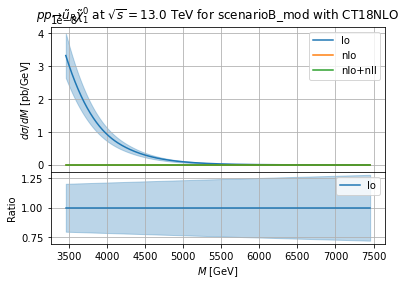

In [2]:
for run_plot in [False ]:
    for scenario in ["scenarioB_mod.in","scenarioA.in"]:
        for lo_pdf,nlo_pdf in [("CT18NLO","CT18NLO")]:
            for p in [2000002, 1000002]:
                li = [hepi.Input(hepi.Order.LO, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.1,id="_")]

                li = hepi.scan_invariant_mass(li, 4000, 10+1,low=2000)
                print(li[0].invariant_mass)
                li = hepi.seven_point_scan(li)

                dl = rs.run(li, False, False)
                if not run_plot:
                    dl = hepi.scale_error(li,dl)
                    hepi.mass_and_ratio_plot(dl,li,"invariant_mass",scale=True,plot_data=False,fill=True)
                    #plot.show()
                    #hepi.plot(dl, "invariant_mass", "nlo", logy=False, label="nlo",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    plot.show()
                    #hepi.plot(dl, "invariant_mass", "nlo_plus_nll", logy=False, label="nlo+nll",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plot.show()
                    #plt.savefig(input.get_output_dir() + "inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")
                                                                                                                                                            

2862.3316600000003
Running: 15 jobs


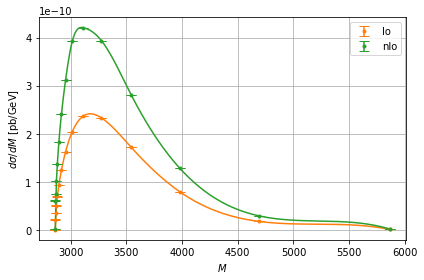

AttributeError: 'function' object has no attribute 'get_output_dir'

In [5]:
for run_plot in [False ]:
    for scenario in ["scenarioB.in"]:
        for lo_pdf,nlo_pdf in [("CT18NLO","CT18NLO")]:
            for p in [1000021]:
                li = [hepi.Input(hepi.Order.NLO, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.1)]

                li = hepi.scan_invariant_mass(li, 3000, 15)
                print(li[0].invariant_mass)
                #li = hepi.seven_point_scan(li)

                dl = rs.run(li, False, True)

                if not run_plot:
                    
                    plot.data([],[],init=True)
                    hepi.plot(dl, "invariant_mass", "lo", logy=False, label="lo",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plot.show()
                    hepi.plot(dl, "invariant_mass", "nlo", logy=False, label="nlo",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    plot.show()
                    #hepi.plot(dl, "invariant_mass", "nlo_plus_nll", logy=False, label="nlo+nll",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plot.show()
                    #plt.savefig(input.get_output_dir() + "inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")
                                                                                                                                                            